In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder #scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in python
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('C:/Users/N Sujatha/Downloads/Project-20190609T020836Z-001/Project/housing.csv')

In [3]:
train.shape

(20640, 10)

In [4]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
train.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [6]:
X = train.drop('median_house_value',axis=1)

In [7]:
train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [8]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
train['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
train['total_bedrooms'] = train['total_bedrooms'].fillna(train['total_bedrooms'].mean())

In [11]:
train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [12]:
le = LabelEncoder()

In [13]:
train['ocean_proximity'] = le.fit_transform(train['ocean_proximity'])

In [14]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [15]:
X = train.drop('median_house_value', axis=1)
y = train.median_house_value

In [16]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
print (X.shape)
print (y.shape)
print (xtrain.shape)
print (xtest.shape)
print (ytrain.shape)
print (ytest.shape)

(20640, 9)
(20640,)
(16512, 9)
(4128, 9)
(16512,)
(4128,)


In [18]:
%pylab inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

Populating the interactive namespace from numpy and matplotlib


In [19]:
lin = LinearRegression()

In [20]:
lin.fit(xtrain, ytrain)
predictions = lin.predict(xtest)

In [21]:
print(sqrt(mean_squared_error(ytest, predictions)))

71098.69982050036


In [22]:
r2 = r2_score(ytest,predictions)

In [23]:
print(r2)

0.6142406531011783


In [24]:
dtree_reg = DecisionTreeRegressor(max_depth=10)

In [25]:
dtree_reg.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [26]:
pred = dtree_reg.predict(xtest)
print(sqrt(mean_squared_error(ytest, pred)))

61362.824961774524


In [27]:
r2 = r2_score(ytest,pred)

In [28]:
print(r2)

0.712654877231987


In [29]:
Rforest_reg = RandomForestRegressor(max_depth=10)

In [30]:
Rforest_reg.fit(xtrain, ytrain)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
predic = Rforest_reg.predict(xtest)
print(sqrt(mean_squared_error(ytest, predic)))

54684.491302899936


In [32]:
r2 = r2_score(ytest,predic)

In [33]:
print(r2)

0.7717969245699721


In [34]:
#performing linear regression with one independent variable
dropcol=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','ocean_proximity']
print(dropcol)
train_med = X.drop(dropcol,axis=1)
print(type(train_med))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity']
<class 'pandas.core.frame.DataFrame'>


In [35]:
X_train2,X_test2,y_train2,y_test2 = model_selection.train_test_split(train_med,y,test_size=0.2,random_state=42)

In [36]:
X_train2.shape,X_train2.size

((16512, 1), 16512)

In [37]:
lin2=LinearRegression()
lin2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
ypred2 = lin2.predict(X_test2)
print(len(ypred2))
print(len(y_test2))
print(ypred2[0:5])
print(y_test2[0:5])

4128
4128
[114958.91676996 150606.88213964 190393.71844449 285059.38345102
 200663.31816103]
20046     47700
3024      45800
15663    500001
20484    218600
9814     278000
Name: median_house_value, dtype: int64


Text(0, 0.5, 'Predicted median_house_value')

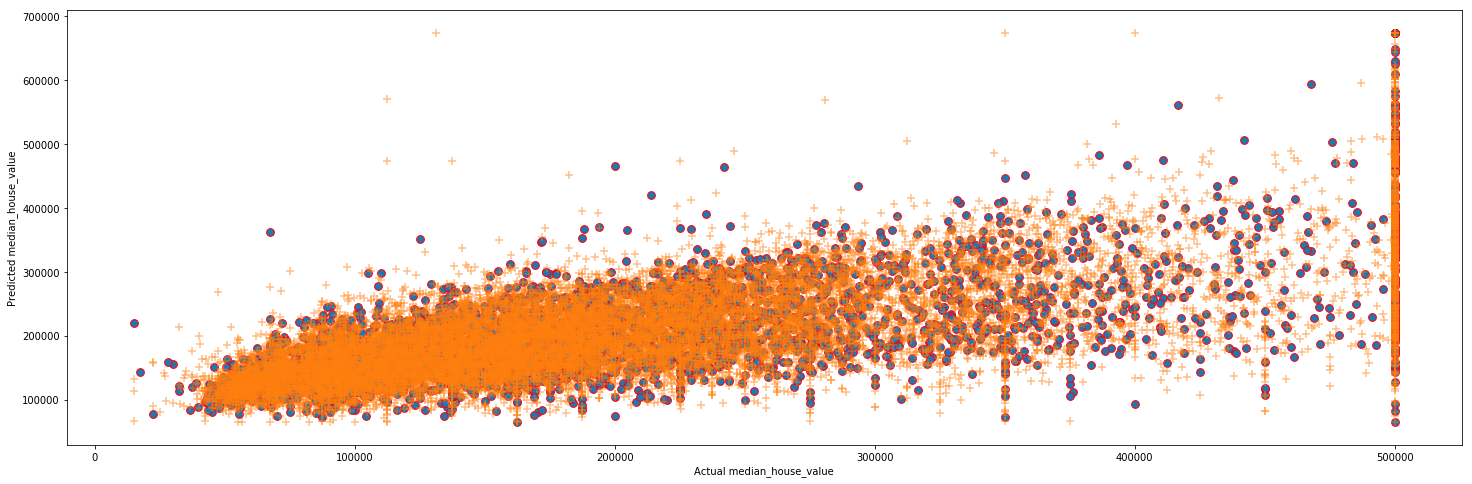

In [39]:
fig = figure(figsize=(25,8))
plt.scatter(y_test2,ypred2,marker="o",edgecolors = "r",s=60)
plt.scatter(y_train2,lin2.predict(X_train2),marker="+",s=50,alpha=0.5)
plt.xlabel("Actual median_house_value")
plt.ylabel("Predicted median_house_value")

Text(0, 0.5, 'Predicted median_house_value')

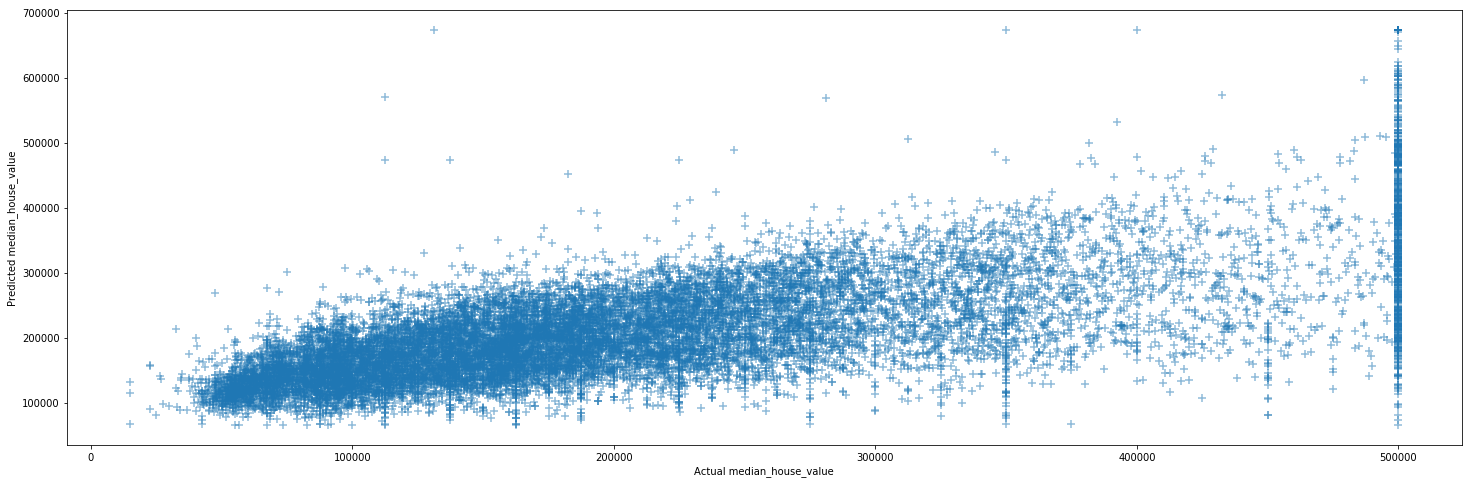

In [42]:
#fitted model for training data
fig = figure(figsize=(25,8))
plt.scatter(y_train2,lin2.predict(X_train2),marker="+",s=50,alpha=0.5)
plt.xlabel("Actual median_house_value")
plt.ylabel("Predicted median_house_value")

Text(0, 0.5, 'Predicted median_house_value')

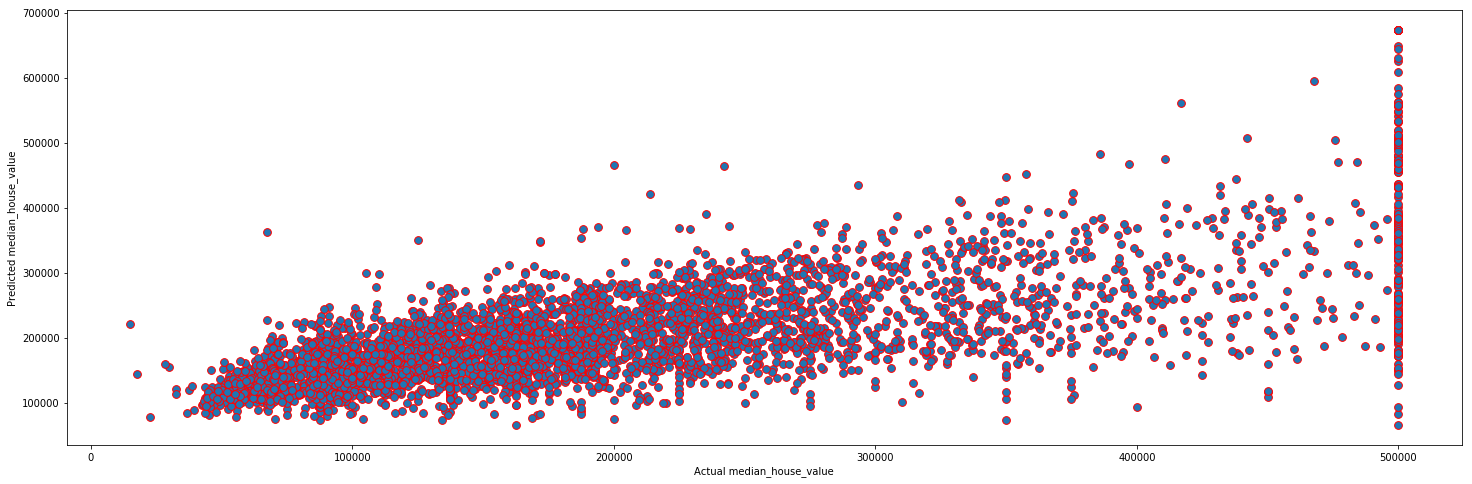

In [44]:
#fitted model for test data
fig = figure(figsize=(25,8))
plt.scatter(y_test2,lin2.predict(X_test2),marker="o",edgecolors = "r",s=60)
plt.xlabel("Actual median_house_value")
plt.ylabel("Predicted median_house_value")